In [1]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import imageio
import glob
import os
import scipy.io
from scipy import signal
from scipy import ndimage
import math
from keras.utils import to_categorical #for one hot encoding
from keras import optimizers

#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility\n
np.random.seed(1)

Using TensorFlow backend.


In [0]:
import pickle
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation
from keras.utils import to_categorical
from keras.models import Model
from keras.utils import np_utils
# import BatchNormalization
from keras.layers.normalization import BatchNormalization

## Dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [0]:
train_set_X = train_features
train_set_Y = train_labels
test_set_X = test_features
test_set_Y = test_labels

In [6]:
def print_shapes_of_dataset():
  print("Train X shape: \t" + str(train_set_X.shape))
  print("Train Y shape: \t" + str(train_set_Y.shape))
  print("Test X shape: \t" + str(test_set_X.shape))
  print("Test Y shape: \t" + str(test_set_Y.shape))

print_shapes_of_dataset()

Train X shape: 	(50000, 32, 32, 3)
Train Y shape: 	(50000, 1)
Test X shape: 	(10000, 32, 32, 3)
Test Y shape: 	(10000, 1)


In [7]:
input_shape = train_set_X.shape[1:]
print(input_shape)

(32, 32, 3)


In [8]:
# one hot encode
encoded_train_Y = to_categorical(train_set_Y)
encoded_train_Y = encoded_train_Y.reshape(encoded_train_Y.shape[0], encoded_train_Y.shape[1])

print(encoded_train_Y.shape)

# one hot encode
encoded_test_Y = to_categorical(test_set_Y)
encoded_test_Y = encoded_test_Y.reshape(encoded_test_Y.shape[0], encoded_test_Y.shape[1])

print(encoded_test_Y.shape)

(50000, 10)
(10000, 10)


## Model

In [0]:
#Define model
model = Sequential()

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed


model.add(Conv2D(32, kernel_size = (3, 3),
                 input_shape = input_shape,
                 name = 'conv_layer_1'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, kernel_size = (3, 3),
                 input_shape = input_shape,
                 name = 'conv_layer_2'))
model.add(BatchNormalization())
model.add(Activation('relu'))


#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_1'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(64, kernel_size = (3, 3),
                 name = 'conv_layer_3'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, kernel_size = (3, 3),
                 name = 'conv_layer_4'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_2'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(128, kernel_size = (3, 3),
                 name = 'conv_layer_5'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name = 'max_pool_layer_3'))

#Add a layer that will flatten out the tensor
model.add(Flatten(name = 'flatten_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(1024, name='dense_layer_1'))
#model.add(BatchNormalization())
model.add(Activation('relu'))

#Add a final dense layer that will be used for prediction
model.add(Dense(encoded_train_Y.shape[1], activation = 'softmax',name='final_layer'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer_1 (Conv2D)        (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pool_layer_1 (MaxPooling (None, 14, 14, 32)        0         
__________

In [0]:
#Compile the model tell which loss to use and the optimizer and a evaluation metric if any
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.SGD(lr=0.001, decay=1e-6),
              metrics=['accuracy'])

In [15]:
history_1 = model.fit(train_set_X, encoded_train_Y,
          batch_size = 50,
          epochs = 100,
          validation_data = (test_set_X, encoded_test_Y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 29s 570us/step - loss: 1.9873 - acc: 0.2816 - val_loss: 1.7928 - val_acc: 0.3593
Epoch 2/100
12200/50000 [======>.......................] - ETA: 19s - loss: 1.7699 - acc: 0.3701

50000/50000 [==============================] - 28s 559us/step - loss: 1.7029 - acc: 0.3906 - val_loss: 1.6272 - val_acc: 0.4080
Epoch 3/100
33650/50000 [===================>..........] - ETA: 8s - loss: 1.5659 - acc: 0.4414

50000/50000 [==============================] - 28s 559us/step - loss: 1.5469 - acc: 0.4499 - val_loss: 1.5179 - val_acc: 0.4577
Epoch 4/100
42150/50000 [========================>.....] - ETA: 4s - loss: 1.4405 - acc: 0.4867

50000/50000 [==============================] - 28s 560us/step - loss: 1.4365 - acc: 0.4882 - val_loss: 1.4410 - val_acc: 0.4812
Epoch 5/100
45150/50000 [==========================>...] - ETA: 2s - loss: 1.3556 - acc: 0.5183

50000/50000 [==============================] - 28s 557us/step - loss: 1.3532 - acc: 0.5184 - val_loss: 1.4428 - val_acc: 0.4823
Epoch 6/100
46850/50000 [===========================>..] - ETA: 1s - loss: 1.2952 - acc: 0.5389

50000/50000 [==============================] - 28s 557us/step - loss: 1.2964 - acc: 0.5390 - val_loss: 1.4117 - val_acc: 0.4854
Epoch 7/100
46600/50000 [==========================>...] - ETA: 1s - loss: 1.2481 - acc: 0.5576

50000/50000 [==============================] - 28s 559us/step - loss: 1.2458 - acc: 0.5577 - val_loss: 1.2907 - val_acc: 0.5320
Epoch 8/100
47350/50000 [===========================>..] - ETA: 1s - loss: 1.2082 - acc: 0.5714

50000/50000 [==============================] - 28s 556us/step - loss: 1.2059 - acc: 0.5725 - val_loss: 1.2430 - val_acc: 0.5548
Epoch 9/100
47550/50000 [===========================>..] - ETA: 1s - loss: 1.1695 - acc: 0.5863

50000/50000 [==============================] - 28s 558us/step - loss: 1.1696 - acc: 0.5858 - val_loss: 1.2021 - val_acc: 0.5728
Epoch 10/100
47650/50000 [===========================>..] - ETA: 1s - loss: 1.1345 - acc: 0.5967

50000/50000 [==============================] - 28s 557us/step - loss: 1.1347 - acc: 0.5969 - val_loss: 1.1930 - val_acc: 0.5793
Epoch 11/100
47600/50000 [===========================>..] - ETA: 1s - loss: 1.1036 - acc: 0.6118

50000/50000 [==============================] - 28s 557us/step - loss: 1.1044 - acc: 0.6116 - val_loss: 1.2383 - val_acc: 0.5575
Epoch 12/100
47850/50000 [===========================>..] - ETA: 1s - loss: 1.0758 - acc: 0.6229

50000/50000 [==============================] - 28s 556us/step - loss: 1.0761 - acc: 0.6223 - val_loss: 1.3049 - val_acc: 0.5375
Epoch 13/100
47400/50000 [===========================>..] - ETA: 1s - loss: 1.0501 - acc: 0.6333

50000/50000 [==============================] - 28s 555us/step - loss: 1.0503 - acc: 0.6329 - val_loss: 1.1376 - val_acc: 0.5950
Epoch 14/100
47400/50000 [===========================>..] - ETA: 1s - loss: 1.0256 - acc: 0.6382

50000/50000 [==============================] - 28s 558us/step - loss: 1.0246 - acc: 0.6390 - val_loss: 1.1992 - val_acc: 0.5831
Epoch 15/100
47850/50000 [===========================>..] - ETA: 1s - loss: 1.0024 - acc: 0.6484

50000/50000 [==============================] - 28s 554us/step - loss: 1.0035 - acc: 0.6478 - val_loss: 1.1159 - val_acc: 0.6073
Epoch 16/100
47150/50000 [===========================>..] - ETA: 1s - loss: 0.9809 - acc: 0.6575

50000/50000 [==============================] - 28s 557us/step - loss: 0.9814 - acc: 0.6575 - val_loss: 1.1821 - val_acc: 0.5813
Epoch 17/100
45900/50000 [==========================>...] - ETA: 2s - loss: 0.9606 - acc: 0.6637

50000/50000 [==============================] - 28s 568us/step - loss: 0.9617 - acc: 0.6636 - val_loss: 1.1524 - val_acc: 0.5939
Epoch 18/100
44400/50000 [=========================>....] - ETA: 2s - loss: 0.9407 - acc: 0.6721

50000/50000 [==============================] - 29s 571us/step - loss: 0.9410 - acc: 0.6721 - val_loss: 1.0873 - val_acc: 0.6191
Epoch 19/100
43850/50000 [=========================>....] - ETA: 3s - loss: 0.9192 - acc: 0.6801

50000/50000 [==============================] - 29s 572us/step - loss: 0.9205 - acc: 0.6796 - val_loss: 1.1570 - val_acc: 0.5966
Epoch 20/100
43850/50000 [=========================>....] - ETA: 3s - loss: 0.9022 - acc: 0.6879

50000/50000 [==============================] - 28s 569us/step - loss: 0.9034 - acc: 0.6871 - val_loss: 1.0790 - val_acc: 0.6267
Epoch 21/100
42700/50000 [========================>.....] - ETA: 3s - loss: 0.8870 - acc: 0.6915

50000/50000 [==============================] - 29s 573us/step - loss: 0.8862 - acc: 0.6903 - val_loss: 1.1796 - val_acc: 0.5878
Epoch 22/100
43100/50000 [========================>.....] - ETA: 3s - loss: 0.8722 - acc: 0.6953

50000/50000 [==============================] - 29s 572us/step - loss: 0.8718 - acc: 0.6960 - val_loss: 1.0449 - val_acc: 0.6366
Epoch 23/100
44300/50000 [=========================>....] - ETA: 2s - loss: 0.8544 - acc: 0.7038

50000/50000 [==============================] - 28s 562us/step - loss: 0.8552 - acc: 0.7040 - val_loss: 1.0342 - val_acc: 0.6392
Epoch 24/100
45800/50000 [==========================>...] - ETA: 2s - loss: 0.8367 - acc: 0.7110

50000/50000 [==============================] - 28s 562us/step - loss: 0.8383 - acc: 0.7102 - val_loss: 1.0181 - val_acc: 0.6453
Epoch 25/100
44900/50000 [=========================>....] - ETA: 2s - loss: 0.8203 - acc: 0.7154

50000/50000 [==============================] - 28s 563us/step - loss: 0.8210 - acc: 0.7160 - val_loss: 1.1162 - val_acc: 0.6125
Epoch 26/100
44600/50000 [=========================>....] - ETA: 2s - loss: 0.8077 - acc: 0.7209

50000/50000 [==============================] - 28s 565us/step - loss: 0.8088 - acc: 0.7208 - val_loss: 1.0420 - val_acc: 0.6411
Epoch 27/100
44300/50000 [=========================>....] - ETA: 3s - loss: 0.7903 - acc: 0.7267

50000/50000 [==============================] - 28s 566us/step - loss: 0.7924 - acc: 0.7259 - val_loss: 1.0961 - val_acc: 0.6219
Epoch 28/100
44050/50000 [=========================>....] - ETA: 3s - loss: 0.7732 - acc: 0.7323

50000/50000 [==============================] - 28s 567us/step - loss: 0.7746 - acc: 0.7318 - val_loss: 1.0507 - val_acc: 0.6450
Epoch 29/100
44800/50000 [=========================>....] - ETA: 2s - loss: 0.7612 - acc: 0.7375

50000/50000 [==============================] - 28s 561us/step - loss: 0.7629 - acc: 0.7371 - val_loss: 1.0349 - val_acc: 0.6455
Epoch 30/100
44750/50000 [=========================>....] - ETA: 2s - loss: 0.7482 - acc: 0.7453

50000/50000 [==============================] - 28s 567us/step - loss: 0.7482 - acc: 0.7455 - val_loss: 1.0203 - val_acc: 0.6478
Epoch 31/100
45300/50000 [==========================>...] - ETA: 2s - loss: 0.7364 - acc: 0.7462

50000/50000 [==============================] - 28s 559us/step - loss: 0.7358 - acc: 0.7466 - val_loss: 1.0190 - val_acc: 0.6483
Epoch 32/100
45300/50000 [==========================>...] - ETA: 2s - loss: 0.7226 - acc: 0.7513

50000/50000 [==============================] - 28s 562us/step - loss: 0.7214 - acc: 0.7522 - val_loss: 1.0381 - val_acc: 0.6417
Epoch 33/100
46050/50000 [==========================>...] - ETA: 2s - loss: 0.7053 - acc: 0.7579

50000/50000 [==============================] - 28s 558us/step - loss: 0.7054 - acc: 0.7577 - val_loss: 0.9880 - val_acc: 0.6613
Epoch 34/100
46300/50000 [==========================>...] - ETA: 1s - loss: 0.6930 - acc: 0.7634

50000/50000 [==============================] - 28s 561us/step - loss: 0.6940 - acc: 0.7632 - val_loss: 1.0335 - val_acc: 0.6519
Epoch 35/100
45100/50000 [==========================>...] - ETA: 2s - loss: 0.6766 - acc: 0.7698

50000/50000 [==============================] - 28s 568us/step - loss: 0.6803 - acc: 0.7683 - val_loss: 1.0619 - val_acc: 0.6399
Epoch 36/100
45600/50000 [==========================>...] - ETA: 2s - loss: 0.6635 - acc: 0.7745

50000/50000 [==============================] - 28s 559us/step - loss: 0.6643 - acc: 0.7740 - val_loss: 1.0312 - val_acc: 0.6521
Epoch 37/100
45300/50000 [==========================>...] - ETA: 2s - loss: 0.6539 - acc: 0.7774

50000/50000 [==============================] - 28s 563us/step - loss: 0.6539 - acc: 0.7770 - val_loss: 1.0839 - val_acc: 0.6325
Epoch 38/100
44950/50000 [=========================>....] - ETA: 2s - loss: 0.6358 - acc: 0.7843

50000/50000 [==============================] - 28s 563us/step - loss: 0.6378 - acc: 0.7838 - val_loss: 1.1297 - val_acc: 0.6300
Epoch 39/100
44750/50000 [=========================>....] - ETA: 2s - loss: 0.6261 - acc: 0.7857

50000/50000 [==============================] - 28s 564us/step - loss: 0.6260 - acc: 0.7853 - val_loss: 1.0108 - val_acc: 0.6615
Epoch 40/100
45050/50000 [==========================>...] - ETA: 2s - loss: 0.6167 - acc: 0.7905

50000/50000 [==============================] - 28s 564us/step - loss: 0.6154 - acc: 0.7914 - val_loss: 1.0944 - val_acc: 0.6381
Epoch 41/100
45150/50000 [==========================>...] - ETA: 2s - loss: 0.6016 - acc: 0.7954

50000/50000 [==============================] - 28s 565us/step - loss: 0.6019 - acc: 0.7953 - val_loss: 0.9924 - val_acc: 0.6690
Epoch 42/100
44850/50000 [=========================>....] - ETA: 2s - loss: 0.5862 - acc: 0.8020

50000/50000 [==============================] - 28s 563us/step - loss: 0.5871 - acc: 0.8009 - val_loss: 1.0361 - val_acc: 0.6557
Epoch 43/100
45250/50000 [==========================>...] - ETA: 2s - loss: 0.5757 - acc: 0.8069

50000/50000 [==============================] - 28s 562us/step - loss: 0.5765 - acc: 0.8063 - val_loss: 1.0066 - val_acc: 0.6621
Epoch 44/100
44800/50000 [=========================>....] - ETA: 2s - loss: 0.5612 - acc: 0.8121

50000/50000 [==============================] - 28s 564us/step - loss: 0.5635 - acc: 0.8111 - val_loss: 1.0114 - val_acc: 0.6693
Epoch 45/100
45950/50000 [==========================>...] - ETA: 2s - loss: 0.5490 - acc: 0.8157

50000/50000 [==============================] - 28s 561us/step - loss: 0.5518 - acc: 0.8147 - val_loss: 1.0568 - val_acc: 0.6574
Epoch 46/100
45850/50000 [==========================>...] - ETA: 2s - loss: 0.5365 - acc: 0.8200

50000/50000 [==============================] - 28s 561us/step - loss: 0.5365 - acc: 0.8201 - val_loss: 1.1244 - val_acc: 0.6356
Epoch 47/100
45650/50000 [==========================>...] - ETA: 2s - loss: 0.5232 - acc: 0.8259

50000/50000 [==============================] - 28s 562us/step - loss: 0.5244 - acc: 0.8249 - val_loss: 1.1790 - val_acc: 0.6290
Epoch 48/100
44800/50000 [=========================>....] - ETA: 2s - loss: 0.5145 - acc: 0.8290

50000/50000 [==============================] - 28s 567us/step - loss: 0.5168 - acc: 0.8280 - val_loss: 1.0402 - val_acc: 0.6608
Epoch 49/100
45100/50000 [==========================>...] - ETA: 2s - loss: 0.5023 - acc: 0.8338

50000/50000 [==============================] - 28s 565us/step - loss: 0.5019 - acc: 0.8338 - val_loss: 1.0856 - val_acc: 0.6433
Epoch 50/100
45500/50000 [==========================>...] - ETA: 2s - loss: 0.4923 - acc: 0.8361

50000/50000 [==============================] - 28s 562us/step - loss: 0.4919 - acc: 0.8363 - val_loss: 1.0534 - val_acc: 0.6671
Epoch 51/100
45250/50000 [==========================>...] - ETA: 2s - loss: 0.4771 - acc: 0.8438

50000/50000 [==============================] - 28s 565us/step - loss: 0.4797 - acc: 0.8428 - val_loss: 1.0296 - val_acc: 0.6688
Epoch 52/100
44550/50000 [=========================>....] - ETA: 2s - loss: 0.4635 - acc: 0.8470

50000/50000 [==============================] - 28s 563us/step - loss: 0.4657 - acc: 0.8458 - val_loss: 1.0492 - val_acc: 0.6665
Epoch 53/100
45700/50000 [==========================>...] - ETA: 2s - loss: 0.4564 - acc: 0.8503

50000/50000 [==============================] - 28s 562us/step - loss: 0.4569 - acc: 0.8501 - val_loss: 1.0598 - val_acc: 0.6594
Epoch 54/100
45300/50000 [==========================>...] - ETA: 2s - loss: 0.4422 - acc: 0.8555

50000/50000 [==============================] - 28s 564us/step - loss: 0.4448 - acc: 0.8546 - val_loss: 1.0480 - val_acc: 0.6635
Epoch 55/100
46000/50000 [==========================>...] - ETA: 2s - loss: 0.4328 - acc: 0.8586

50000/50000 [==============================] - 28s 560us/step - loss: 0.4351 - acc: 0.8579 - val_loss: 1.0917 - val_acc: 0.6546
Epoch 56/100
45900/50000 [==========================>...] - ETA: 2s - loss: 0.4223 - acc: 0.8647

50000/50000 [==============================] - 28s 561us/step - loss: 0.4233 - acc: 0.8640 - val_loss: 1.0921 - val_acc: 0.6628
Epoch 57/100
46050/50000 [==========================>...] - ETA: 2s - loss: 0.4104 - acc: 0.8676

50000/50000 [==============================] - 28s 560us/step - loss: 0.4111 - acc: 0.8673 - val_loss: 1.1759 - val_acc: 0.6385
Epoch 58/100
46350/50000 [==========================>...] - ETA: 1s - loss: 0.4009 - acc: 0.8724

50000/50000 [==============================] - 28s 559us/step - loss: 0.4024 - acc: 0.8715 - val_loss: 1.1216 - val_acc: 0.6550
Epoch 59/100
46650/50000 [==========================>...] - ETA: 1s - loss: 0.3892 - acc: 0.8756

50000/50000 [==============================] - 28s 557us/step - loss: 0.3903 - acc: 0.8755 - val_loss: 1.0773 - val_acc: 0.6613
Epoch 60/100
45250/50000 [==========================>...] - ETA: 2s - loss: 0.3816 - acc: 0.8772

50000/50000 [==============================] - 28s 566us/step - loss: 0.3825 - acc: 0.8764 - val_loss: 1.1566 - val_acc: 0.6489
Epoch 61/100
46000/50000 [==========================>...] - ETA: 2s - loss: 0.3686 - acc: 0.8827

50000/50000 [==============================] - 28s 559us/step - loss: 0.3689 - acc: 0.8826 - val_loss: 1.1093 - val_acc: 0.6595
Epoch 62/100
46100/50000 [==========================>...] - ETA: 2s - loss: 0.3602 - acc: 0.8862

50000/50000 [==============================] - 28s 559us/step - loss: 0.3596 - acc: 0.8862 - val_loss: 1.1326 - val_acc: 0.6593
Epoch 63/100
45400/50000 [==========================>...] - ETA: 2s - loss: 0.3490 - acc: 0.8913

50000/50000 [==============================] - 28s 559us/step - loss: 0.3486 - acc: 0.8914 - val_loss: 1.1265 - val_acc: 0.6597
Epoch 64/100
45800/50000 [==========================>...] - ETA: 2s - loss: 0.3382 - acc: 0.8942

50000/50000 [==============================] - 28s 558us/step - loss: 0.3388 - acc: 0.8937 - val_loss: 1.1679 - val_acc: 0.6500
Epoch 65/100
45150/50000 [==========================>...] - ETA: 2s - loss: 0.3301 - acc: 0.8977

50000/50000 [==============================] - 28s 562us/step - loss: 0.3307 - acc: 0.8975 - val_loss: 1.1457 - val_acc: 0.6588
Epoch 66/100
45900/50000 [==========================>...] - ETA: 2s - loss: 0.3218 - acc: 0.9003

50000/50000 [==============================] - 28s 558us/step - loss: 0.3231 - acc: 0.8996 - val_loss: 1.1571 - val_acc: 0.6534
Epoch 67/100
46000/50000 [==========================>...] - ETA: 2s - loss: 0.3109 - acc: 0.9043

50000/50000 [==============================] - 28s 558us/step - loss: 0.3123 - acc: 0.9038 - val_loss: 1.2361 - val_acc: 0.6410
Epoch 68/100
45650/50000 [==========================>...] - ETA: 2s - loss: 0.3046 - acc: 0.9062

50000/50000 [==============================] - 28s 560us/step - loss: 0.3055 - acc: 0.9058 - val_loss: 1.1598 - val_acc: 0.6581
Epoch 69/100


50000/50000 [==============================] - 28s 554us/step - loss: 0.2955 - acc: 0.9116 - val_loss: 1.1925 - val_acc: 0.6532
Epoch 70/100
46200/50000 [==========================>...] - ETA: 1s - loss: 0.2887 - acc: 0.9124

50000/50000 [==============================] - 28s 560us/step - loss: 0.2882 - acc: 0.9122 - val_loss: 1.1775 - val_acc: 0.6553
Epoch 71/100
45600/50000 [==========================>...] - ETA: 2s - loss: 0.2772 - acc: 0.9180

50000/50000 [==============================] - 28s 560us/step - loss: 0.2788 - acc: 0.9175 - val_loss: 1.1949 - val_acc: 0.6553
Epoch 72/100
46150/50000 [==========================>...] - ETA: 2s - loss: 0.2688 - acc: 0.9214

50000/50000 [==============================] - 28s 558us/step - loss: 0.2697 - acc: 0.9212 - val_loss: 1.2135 - val_acc: 0.6478
Epoch 73/100
45950/50000 [==========================>...] - ETA: 2s - loss: 0.2630 - acc: 0.9213

50000/50000 [==============================] - 28s 558us/step - loss: 0.2625 - acc: 0.9217 - val_loss: 1.2680 - val_acc: 0.6373
Epoch 74/100
45600/50000 [==========================>...] - ETA: 2s - loss: 0.2529 - acc: 0.9257

50000/50000 [==============================] - 28s 563us/step - loss: 0.2540 - acc: 0.9251 - val_loss: 1.2613 - val_acc: 0.6465
Epoch 75/100
45350/50000 [==========================>...] - ETA: 2s - loss: 0.2465 - acc: 0.9294

50000/50000 [==============================] - 28s 564us/step - loss: 0.2472 - acc: 0.9284 - val_loss: 1.2180 - val_acc: 0.6586
Epoch 76/100
46400/50000 [==========================>...] - ETA: 1s - loss: 0.2396 - acc: 0.9317

50000/50000 [==============================] - 28s 557us/step - loss: 0.2393 - acc: 0.9318 - val_loss: 1.2412 - val_acc: 0.6509
Epoch 77/100
45300/50000 [==========================>...] - ETA: 2s - loss: 0.2282 - acc: 0.9349

50000/50000 [==============================] - 28s 566us/step - loss: 0.2296 - acc: 0.9342 - val_loss: 1.2890 - val_acc: 0.6484
Epoch 78/100
45750/50000 [==========================>...] - ETA: 2s - loss: 0.2225 - acc: 0.9373

50000/50000 [==============================] - 28s 564us/step - loss: 0.2229 - acc: 0.9369 - val_loss: 1.2676 - val_acc: 0.6526
Epoch 79/100
45850/50000 [==========================>...] - ETA: 2s - loss: 0.2182 - acc: 0.9396

50000/50000 [==============================] - 28s 562us/step - loss: 0.2176 - acc: 0.9395 - val_loss: 1.4070 - val_acc: 0.6320
Epoch 80/100
46250/50000 [==========================>...] - ETA: 1s - loss: 0.2111 - acc: 0.9424

50000/50000 [==============================] - 28s 563us/step - loss: 0.2111 - acc: 0.9425 - val_loss: 1.2832 - val_acc: 0.6535
Epoch 81/100
46550/50000 [==========================>...] - ETA: 1s - loss: 0.2037 - acc: 0.9450

50000/50000 [==============================] - 28s 563us/step - loss: 0.2035 - acc: 0.9448 - val_loss: 1.3100 - val_acc: 0.6478
Epoch 82/100
46600/50000 [==========================>...] - ETA: 1s - loss: 0.1972 - acc: 0.9471

50000/50000 [==============================] - 28s 562us/step - loss: 0.1981 - acc: 0.9467 - val_loss: 1.4399 - val_acc: 0.6197
Epoch 83/100
45900/50000 [==========================>...] - ETA: 2s - loss: 0.1916 - acc: 0.9495

50000/50000 [==============================] - 28s 564us/step - loss: 0.1919 - acc: 0.9493 - val_loss: 1.3252 - val_acc: 0.6489
Epoch 84/100
46300/50000 [==========================>...] - ETA: 1s - loss: 0.1869 - acc: 0.9507

50000/50000 [==============================] - 28s 561us/step - loss: 0.1867 - acc: 0.9508 - val_loss: 1.3563 - val_acc: 0.6458
Epoch 85/100
44800/50000 [=========================>....] - ETA: 2s - loss: 0.1773 - acc: 0.9545

50000/50000 [==============================] - 28s 564us/step - loss: 0.1781 - acc: 0.9542 - val_loss: 1.3317 - val_acc: 0.6483
Epoch 86/100
44650/50000 [=========================>....] - ETA: 2s - loss: 0.1758 - acc: 0.9540

50000/50000 [==============================] - 28s 563us/step - loss: 0.1760 - acc: 0.9537 - val_loss: 1.3609 - val_acc: 0.6467
Epoch 87/100
44400/50000 [=========================>....] - ETA: 2s - loss: 0.1700 - acc: 0.9571

50000/50000 [==============================] - 28s 565us/step - loss: 0.1708 - acc: 0.9566 - val_loss: 1.4299 - val_acc: 0.6361
Epoch 88/100
44850/50000 [=========================>....] - ETA: 2s - loss: 0.1635 - acc: 0.9598

50000/50000 [==============================] - 28s 565us/step - loss: 0.1635 - acc: 0.9595 - val_loss: 1.3486 - val_acc: 0.6537
Epoch 89/100
43450/50000 [=========================>....] - ETA: 3s - loss: 0.1583 - acc: 0.9603

50000/50000 [==============================] - 28s 568us/step - loss: 0.1595 - acc: 0.9602 - val_loss: 1.3540 - val_acc: 0.6535
Epoch 90/100
43550/50000 [=========================>....] - ETA: 3s - loss: 0.1528 - acc: 0.9631

50000/50000 [==============================] - 28s 567us/step - loss: 0.1537 - acc: 0.9626 - val_loss: 1.3997 - val_acc: 0.6420
Epoch 91/100
43450/50000 [=========================>....] - ETA: 3s - loss: 0.1468 - acc: 0.9655

50000/50000 [==============================] - 28s 567us/step - loss: 0.1482 - acc: 0.9649 - val_loss: 1.4595 - val_acc: 0.6390
Epoch 92/100
43750/50000 [=========================>....] - ETA: 3s - loss: 0.1437 - acc: 0.9655

50000/50000 [==============================] - 28s 565us/step - loss: 0.1438 - acc: 0.9655 - val_loss: 1.3981 - val_acc: 0.6500
Epoch 93/100
45450/50000 [==========================>...] - ETA: 2s - loss: 0.1408 - acc: 0.9667

50000/50000 [==============================] - 28s 559us/step - loss: 0.1419 - acc: 0.9665 - val_loss: 1.4071 - val_acc: 0.6468
Epoch 94/100
46000/50000 [==========================>...] - ETA: 2s - loss: 0.1337 - acc: 0.9690

50000/50000 [==============================] - 28s 557us/step - loss: 0.1344 - acc: 0.9686 - val_loss: 1.4156 - val_acc: 0.6516
Epoch 95/100
45150/50000 [==========================>...] - ETA: 2s - loss: 0.1312 - acc: 0.9693

50000/50000 [==============================] - 28s 563us/step - loss: 0.1331 - acc: 0.9684 - val_loss: 1.4786 - val_acc: 0.6433
Epoch 96/100
46500/50000 [==========================>...] - ETA: 1s - loss: 0.1267 - acc: 0.9720

50000/50000 [==============================] - 28s 557us/step - loss: 0.1273 - acc: 0.9718 - val_loss: 1.4360 - val_acc: 0.6496
Epoch 97/100
45800/50000 [==========================>...] - ETA: 2s - loss: 0.1228 - acc: 0.9730

50000/50000 [==============================] - 28s 563us/step - loss: 0.1232 - acc: 0.9729 - val_loss: 1.4893 - val_acc: 0.6399
Epoch 98/100
45150/50000 [==========================>...] - ETA: 2s - loss: 0.1199 - acc: 0.9733

50000/50000 [==============================] - 28s 564us/step - loss: 0.1202 - acc: 0.9731 - val_loss: 1.4561 - val_acc: 0.6491
Epoch 99/100
45250/50000 [==========================>...] - ETA: 2s - loss: 0.1162 - acc: 0.9742

50000/50000 [==============================] - 28s 563us/step - loss: 0.1174 - acc: 0.9737 - val_loss: 1.4487 - val_acc: 0.6485
Epoch 100/100
44450/50000 [=========================>....] - ETA: 2s - loss: 0.1118 - acc: 0.9763

50000/50000 [==============================] - 28s 565us/step - loss: 0.1122 - acc: 0.9760 - val_loss: 1.4718 - val_acc: 0.6475


In [14]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        3.0G        167M        259M        9.6G        9.2G
Swap:            0B          0B          0B


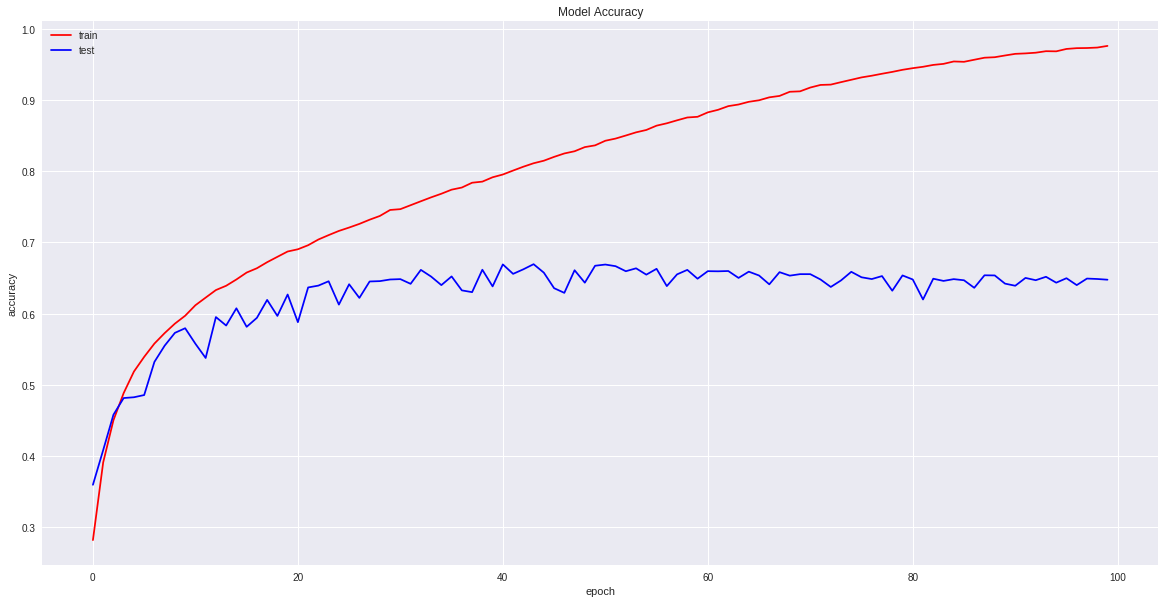

In [16]:
# list all data in history
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history_1.history['acc'], color = 'r')
plt.plot(history_1.history['val_acc'], color = 'b')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


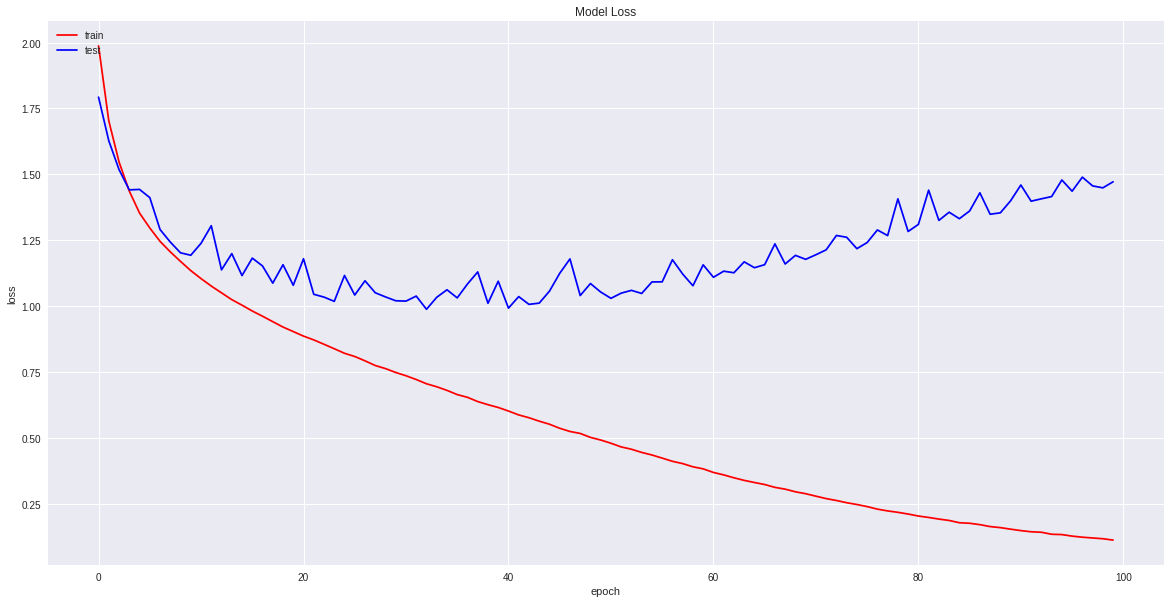

In [17]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history_1.history['loss'], color = 'r')
plt.plot(history_1.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()